# Linear regression with multi variables


Implement linear regression with multiple variables to predict the prices of houses. Suppose you are selling your house and you want to know what a good market price would be. One way to do this is to first collect information on recent houses sold and make a model of housing prices.

The file house.csv contains a training set of housing prices in some state. <br> <br>
The first column is the size of the house (in square feet). <br>
The second column is the number of bedrooms. <br>
The third column is the number of floors. <br>
The fourth column is the age of the house. <br>
The Fifth column corresponds to the price of the house in 1000s of dollars 

### Importing libraries and modules

In [198]:
import numpy as np
import matplotlib.pyplot as plt
import csv
import math
import copy

### Accessing and Storing Data from csv file

Text(0, 0.5, 'Price ($1000s)')

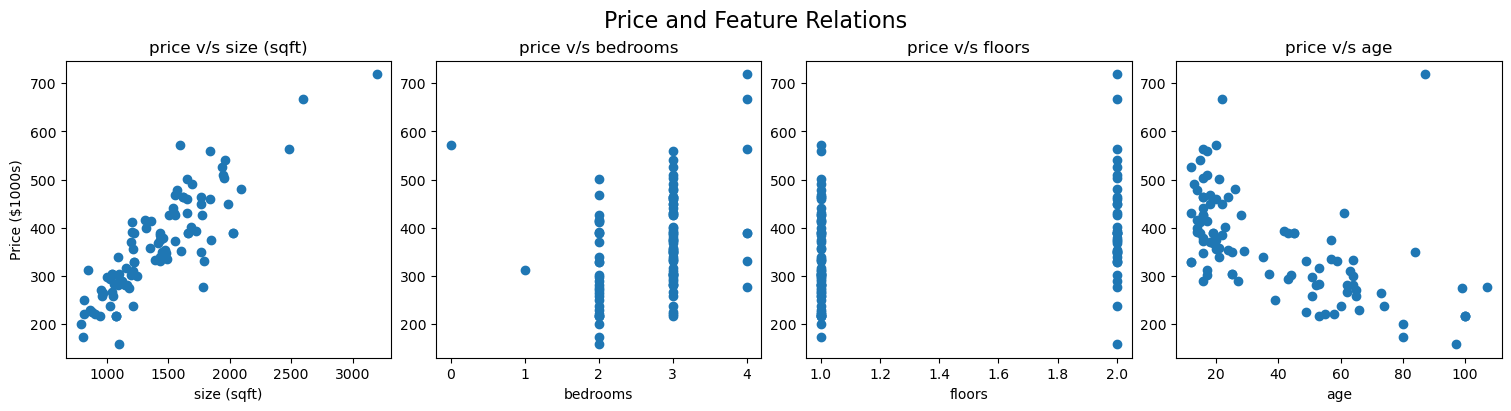

In [199]:
X_features = np.array(["size (sqft)", "bedrooms", "floors", "age"])
X_train = [] # size, bedroom
y_train = [] # price

with open('houses.csv', newline='') as housing_data:
    reader = csv.reader(housing_data)

    for row in reader:
        x_parameters = [] 
        for i in range(4):
            x_parameters.append(float(row[i]))
        X_train.append(x_parameters)
        y_train.append(float(row[-1]))

X_train = np.array(X_train)
y_train = np.array(y_train)


fig, axs = plt.subplots(1,4, layout="constrained", figsize=(15,4))
fig.suptitle("Price and Feature Relations", fontsize=16)

for i in range(len(X_features)):
    axs[i].scatter(X_train[:,i], y_train[:])  
    axs[i].set_xlabel(f"{X_features[i]}")
    axs[i].set_title(f"price v/s {X_features[i]}")
axs[0].set_ylabel("Price ($1000s)")

### Creating our Model

#### Predict function

In [200]:
def predict(X, w, b):
    return np.dot(X, w) + b

#### Feature Scaling

Text(0.5, 1.0, 'Size v/s Age (after z-normalization)')

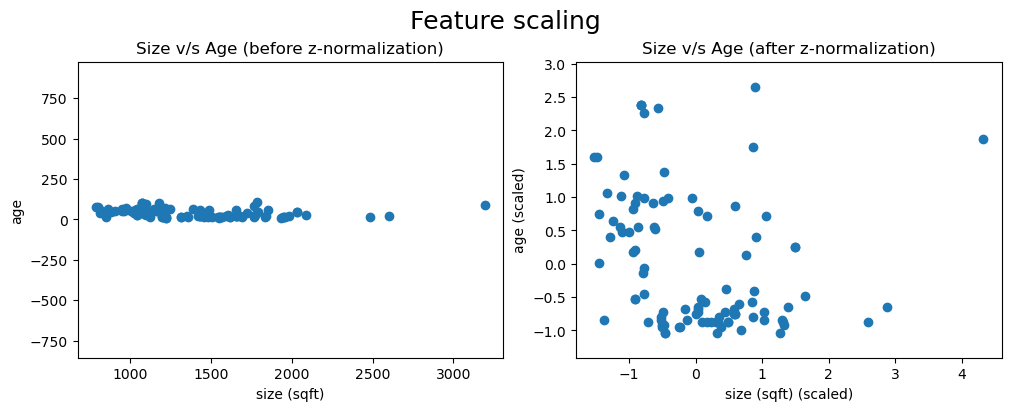

In [201]:
def feature_scale(X):
    
    # Using division by max of X -> x(i) / x(max)
    # X_max = X.max(axis=0) # returns an array of max nums from each column
    # X_scaled = X / X_max
    # return X_scaled

    # Using Mean normalisation -> x(i) - mean(x) / x(max) - x(min)
    # X_max = X.max(axis=0)
    # X_min = X.min(axis=0)
    # X_mean = X.mean(axis=0)
    # X_scaled = (X - X_mean) / (X_max - X_min)
    # return X_scaled

    # Using Z-score normalization -> x(i) - mean(x) / standard deviation(x)
    X_mean = X.mean(axis=0)
    X_std = X.std(axis=0)
    X_scaled = (X - X_mean) / X_std
    return X_scaled, X_mean, X_std

X_scaled, X_mean, X_std = feature_scale(X_train)

fig, axs = plt.subplots(1,2, layout="constrained", figsize=(10,4))
fig.suptitle("Feature scaling", fontsize=18)

# without scaling
axs[0].scatter(X_train[:,0], X_train[:,3])
axs[0].set(xlabel=f"{X_features[0]}", ylabel=f"{X_features[3]}")
axs[0].axis('equal')
axs[0].set_title("Size v/s Age (before z-normalization)")

# with scaling
axs[1].scatter(X_scaled[:,0], X_scaled[:,3])
axs[1].set(xlabel=f"{X_features[0]} (scaled)", ylabel=f"{X_features[3]} (scaled)")
axs[1].axis('equal')
axs[1].set_title("Size v/s Age (after z-normalization)")


#### Cost function

In [202]:
def cost_func(X, y, w, b):

    # Loop implementation
    # m = len(y)
    # total_cost = 0
    # for row in range(m):
    #     prediction = 0
    #     for col in range(len(X_features)):
    #         prediction += X[row][col]*w[col]
    #     prediction += b
    #     total_cost += (prediction - y[row])**2

    # cost = total_cost / (2*m)
    # return cost

    # Matrix implementation
    m = len(y)
    predictions = predict(X, w, b)
    cost = (1 / (2*m)) * np.sum((predictions - y)**2)
    return cost

#### Gradient descent algorithm, updating weights

In [203]:
def cost_derivative(X, y, w, b):

    # Loop implementation

    # Matrix implementation
    m = len(y)
    predictions = predict(X, w, b)
    dj_dw = np.dot(X.T, predictions - y ) / m
    dj_db = np.sum(predictions - y) / m
    return dj_dw, dj_db

def update_weights(X, y, w, b, learning_rate):
    dj_dw, dj_db = cost_derivative(X, y, w, b)
    w -= learning_rate * dj_dw
    b -= learning_rate * dj_db
    return w, b

#### Training model

In [204]:
def train_model(X, y, learning_rate, epoch, w=[0,0,0,0], b=0):
    cost_history = []

    for i in range(epoch):
        cost = cost_func(X, y, w, b)
        cost_history.append(cost)

        w, b = update_weights(X, y, w, b, learning_rate)

        if (i % (math.ceil(epoch / 10)) == 0):
            print(f"At w1 = {w} and b = {b}, cost_func = {cost}")
    
    cost_history = np.array(cost_history)
    return w, b, cost_history

### Model in action

At w1 = [ 26.74764041   9.05740478   9.98240635 -17.97979507] and b = 108.671856, cost_func = 71024.09206744001
At w1 = [110.61121066 -21.47215692 -32.65951646 -37.77980224] and b = 362.23951999999997, cost_func = 219.71130326157137
At w1 = [110.61335167 -21.47323881 -32.66070319 -37.77938363] and b = 362.23951999999997, cost_func = 219.71130176496206
At w1 = [110.61335173 -21.47323884 -32.66070323 -37.77938362] and b = 362.23951999999997, cost_func = 219.71130176496206
At w1 = [110.61335173 -21.47323884 -32.66070323 -37.77938362] and b = 362.23951999999997, cost_func = 219.71130176496197
At w1 = [110.61335173 -21.47323884 -32.66070323 -37.77938362] and b = 362.23951999999997, cost_func = 219.71130176496197
At w1 = [110.61335173 -21.47323884 -32.66070323 -37.77938362] and b = 362.23951999999997, cost_func = 219.71130176496197
At w1 = [110.61335173 -21.47323884 -32.66070323 -37.77938362] and b = 362.23951999999997, cost_func = 219.71130176496197
At w1 = [110.61335173 -21.47323884 -32.66

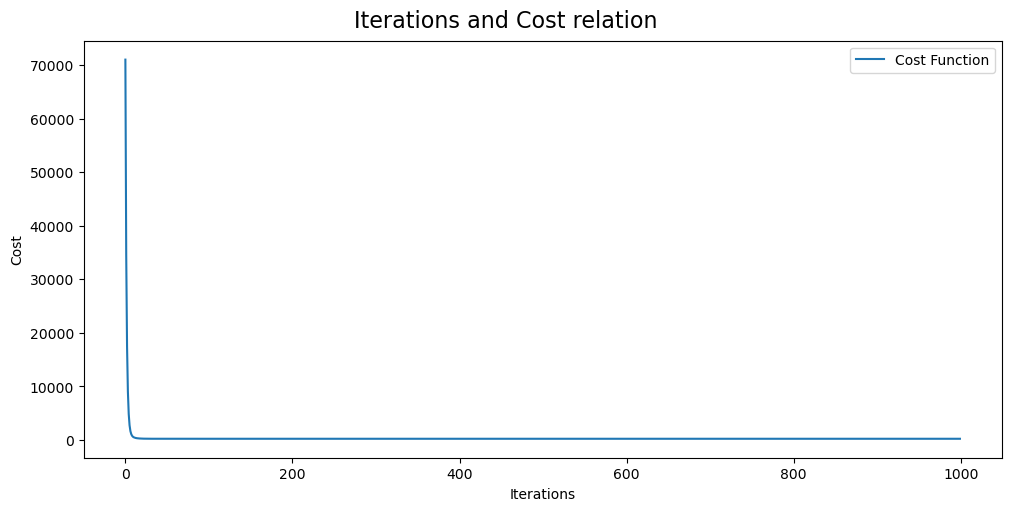

In [205]:
learning_rate = 0.3
epoch = 1000
X_fscaled, X_mean, X_std = feature_scale(X_train)
final_w, final_b, cost_history = train_model(X_scaled, y_train, learning_rate, epoch)
print(f"Final w = {final_w} and b = {final_b} at cost = {cost_func(X_scaled, y_train, final_w, final_b)}")

fig, ax = plt.subplots(1, layout="constrained")
fig.suptitle("Iterations and Cost relation", fontsize=16)

ax.plot(np.arange(epoch), cost_history)
ax.set(xlabel="Iterations", ylabel="Cost")
ax.legend(["Cost Function"])

## Predicting House price using the obtained model


In [206]:
# 1.593000000000000000e+03,0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+01,5.720000000000000000e+02
i_p = np.array([1.593000000000000000e+03,0.000000000000000000e+00,1.000000000000000000e+00,2.000000000000000000e+01])
scaled_input = (i_p - X_mean) / X_std
house_price = predict(scaled_input, final_w, final_b)
print(f"Predicted house price for size {i_p[0]} (in sqft), {i_p[1]} bedrooms, {i_p[2]} floors, and {i_p[3]} (years) age is {house_price} thousand dollars")

Predicted house price for size 1593.0 (in sqft), 0.0 bedrooms, 1.0 floors, and 20.0 (years) age is 552.4185903695445 thousand dollars


### Prediction and comparision of each feature

Text(0, 0.5, 'Price (in $1000s)')

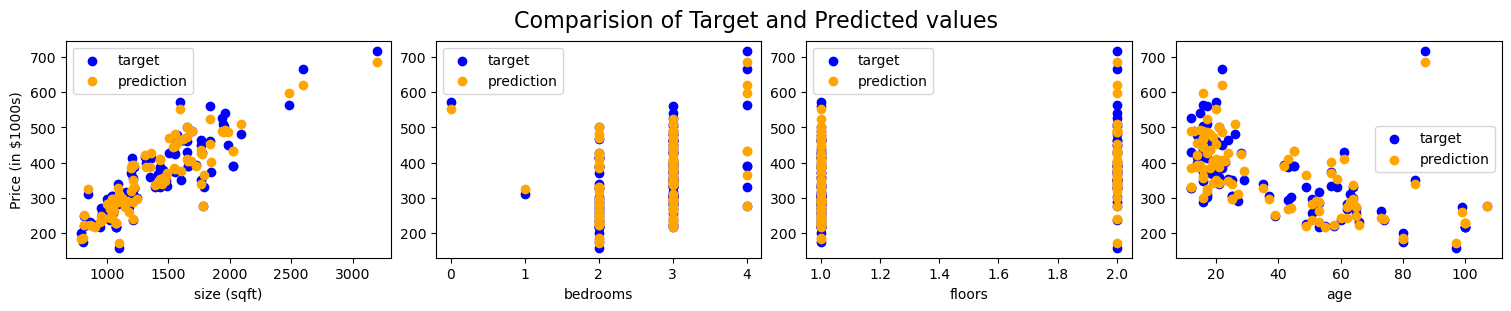

In [207]:
X_test = copy.copy(X_train)
scaled_X_test = (X_test - X_mean) / X_std
y_test = predict(scaled_X_test, final_w, final_b)

fig, ax = plt.subplots(1,4, layout="constrained", figsize=(15,3))
fig.suptitle("Comparision of Target and Predicted values", fontsize=16)

for i in range(len(X_features)):
    ax[i].scatter(X_train[:,i], y_train, color="blue")
    ax[i].scatter(X_test[:,i], y_test, color="orange")
    ax[i].legend(["target", "prediction"])
    ax[i].set_xlabel(f"{X_features[i]}")
ax[0].set_ylabel(f"Price (in $1000s)")